**Práctica Tensorflow**

Disponemos de un set de imágenes etiquetadas (Dataset.zip) como: cloudy, rain, shine, y sunrise.

El objetivo de la práctica consiste en crear un modelo que nos permita determinar, a partir de una imágen de test, la etiqueta correcta de nuestra imágen. Se requiere una precisión mínima de entrenamiento del 94%. Llegado este punto se debe parar el entrenamiento.

Dada la complejidad del problema, se deberá:
- probar diferentes optimizadores
- learning_rate
- epochs, batch_size, steps_per_epoch.

Para cada una de estas comprobaciones, dar una breve explicación su funcionamiento y de los resultados obtenidos.



Importamos las librerías necesarias para el desarrollo de la práctica:


In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

from google.colab import drive

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Se ha subido al google drive el dataset de imágenes para la práctica. Para ello se han creado dos carpetas, una de train y otra de test, y en cada una de ellas se han creado 4 carpetas, para cada una de las clases en las que se dividen las imágenes.

El reparto que se ha realizado ha sido un 70% para train, y un 30% para test, de cada una de las categorías.

In [0]:
# conectamos con google drive, y accedemos a las carpetas de train y test donde están las imágenes

drivedir = '/content/gdrive'
pracdir = drivedir + '/My Drive/practicaTensorflow'
datadir_train = pracdir + '/train' 
datadir_test = pracdir + '/test' 

drive.mount(drivedir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Usamos Callback para definir un valor en el cual parar la ejecución porque ya hemos llegado al valor objetivo. En este caso pararemos el entrenamiento al llegar al 94%.

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.94):
      print("\nSe ha alcanzado una precisión del 94%!")
      self.model.stop_training = True

Usamos ImageDataGenerator y luego "flow_from_directory" para coger las imágenes comentadas de google drive y hacer la preparación con algunas técnicas de Data Augmentation para dejarlas listas para el mejor entrenamiento de los modelos.

Se le aplica a los datos de training: shear_range (rango para aplicar un cambio en la intensidad), zoom_range (rango para aplicar un zoom aleatoriamente), rotation_range (se le pasa un rango de grados para hacer rotaciones aleatorias en las imágenes) y horizontal_flip (a True voltea algunas imágenes aleatoriamente de forma horizontal).

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        datadir_train,
        target_size=(255, 255),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        datadir_test,
        target_size=(255, 255),
        batch_size=32,
        class_mode='binary')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


Generamos el primer modelo, con las capas correspondientes, y usando la función callback definida anteriormente y los datos de train y test anteriores, hacemos el entrenamiento y validación.

Con el optimizador Adam y learning rate 0.001, y otros parametros como steps_per_epoch=2000, llegamos al 94% y por tanto se para el entrenamiento, en el epoch número 17.

Luego pintamos las gráficas de accuracy y función loss, tanto para training como para validation.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

callbacks = myCallback()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=2000, epochs=30, validation_data=test_generator, callbacks=[myCallback()])

Epoch 1/30
25/25 [==============================] - 529s 21s/step - loss: 4.5029 - acc: 0.4956 - val_loss: 0.8464 - val_acc: 0.6805
Epoch 2/30
25/25 [==============================] - 156s 6s/step - loss: 0.6377 - acc: 0.7903 - val_loss: 0.8139 - val_acc: 0.7160
Epoch 3/30
25/25 [==============================] - 155s 6s/step - loss: 0.4937 - acc: 0.8030 - val_loss: 0.4417 - val_acc: 0.8639
Epoch 4/30
25/25 [==============================] - 155s 6s/step - loss: 0.4098 - acc: 0.8310 - val_loss: 0.4822 - val_acc: 0.8462
Epoch 5/30
25/25 [==============================] - 155s 6s/step - loss: 0.4131 - acc: 0.8335 - val_loss: 0.4513 - val_acc: 0.8698
Epoch 6/30
25/25 [==============================] - 156s 6s/step - loss: 0.3927 - acc: 0.8577 - val_loss: 0.6124 - val_acc: 0.8136
Epoch 7/30
25/25 [==============================] - 155s 6s/step - loss: 0.3481 - acc: 0.8513 - val_loss: 0.4366 - val_acc: 0.8639
Epoch 8/30
25/25 [==============================] - 155s 6s/step - loss: 0.3548 - 

In [0]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

11/11 [==============================] - 14s 1s/step - loss: 0.4161 - acc: 0.8728
Test accuracy: 0.87278104


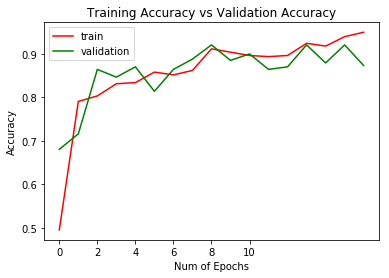

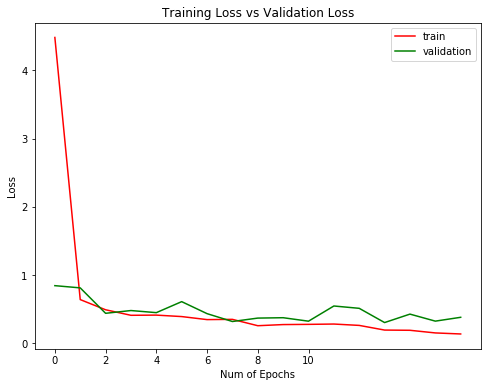

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)  
plt.plot(history.history['acc'],'r')  
plt.plot(history.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history.history['loss'],'r')  
plt.plot(history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

Probamos el modelo por segunda vez, y lo que vamos a cambiar es el optimizador utilizado, que en lugar de Adam usaremos SGD.

Con este optimizador no se alcanza en 30 epochs el 90%, por lo que parece que no es capaz de llegar al punto que llegamos con el intento anterior.

Para siguientes pruebas seguiremos con el optimizador Adam por tanto.

In [0]:
train_datagen_2 = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

test_datagen_2 = ImageDataGenerator(rescale=1./255)

train_generator_2 = train_datagen_2.flow_from_directory(
        datadir_train,
        target_size=(255, 255),
        batch_size=32,
        class_mode='binary')

test_generator_2 = test_datagen_2.flow_from_directory(
        datadir_test,
        target_size=(255, 255),
        batch_size=32,
        class_mode='binary')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


In [0]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

callbacks = myCallback()

model_2.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit_generator(train_generator_2, steps_per_epoch=2000, epochs=30, validation_data=test_generator_2, callbacks=[myCallback()])

Epoch 1/30
25/25 [==============================] - 156s 6s/step - loss: 1.5218 - acc: 0.4320 - val_loss: 1.1282 - val_acc: 0.5207
Epoch 2/30
25/25 [==============================] - 150s 6s/step - loss: 1.0768 - acc: 0.5883 - val_loss: 0.9191 - val_acc: 0.6686
Epoch 3/30
25/25 [==============================] - 150s 6s/step - loss: 0.9165 - acc: 0.6747 - val_loss: 0.8599 - val_acc: 0.5444
Epoch 4/30
25/25 [==============================] - 150s 6s/step - loss: 0.8363 - acc: 0.6874 - val_loss: 0.6996 - val_acc: 0.7544
Epoch 5/30
25/25 [==============================] - 151s 6s/step - loss: 0.7749 - acc: 0.7166 - val_loss: 0.6739 - val_acc: 0.7396
Epoch 6/30
25/25 [==============================] - 149s 6s/step - loss: 0.7188 - acc: 0.7344 - val_loss: 0.5865 - val_acc: 0.8432
Epoch 7/30
25/25 [==============================] - 151s 6s/step - loss: 0.6771 - acc: 0.7497 - val_loss: 0.5870 - val_acc: 0.8018
Epoch 8/30
25/25 [==============================] - 150s 6s/step - loss: 0.6824 - a

In [0]:
test_loss_2, test_acc_2 = model_2.evaluate(test_generator_2)
print('Test accuracy:', test_acc_2)

11/11 [==============================] - 15s 1s/step - loss: 0.7099 - acc: 0.7663
Test accuracy: 0.7662722


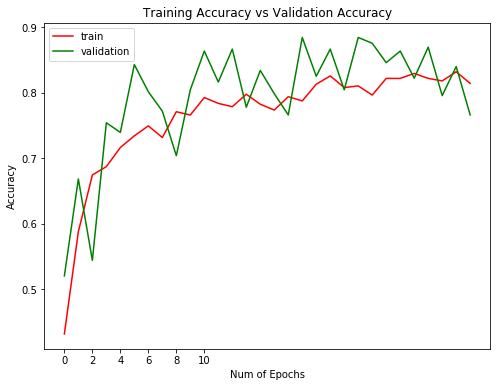

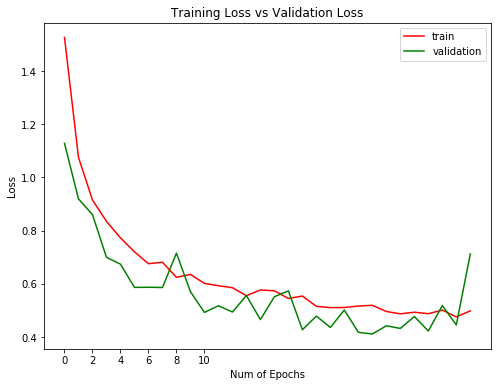

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)  
plt.plot(history_2.history['acc'],'r')  
plt.plot(history_2.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history_2.history['loss'],'r')  
plt.plot(history_2.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

Para la tercera prueba volvemos al optimizador Adam, y vamos a modificar el parámetro steps_per_epoch a 1000 en el entrenamiento, y el parámetro batch_size aumentamos a 64 al jugar con el dataset.

Se llega al 94% en el epoch número 18, sólo 1 de diferencia con la primera prueba. Si da ligeramente la impresión de que aprende o se estabiliza algo más pronto.

In [0]:
train_datagen_3 = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

test_datagen_3 = ImageDataGenerator(rescale=1./255)

train_generator_3 = train_datagen_3.flow_from_directory(
        datadir_train,
        target_size=(255, 255),
        batch_size=64,
        class_mode='binary')

test_generator_3 = test_datagen_3.flow_from_directory(
        datadir_test,
        target_size=(255, 255),
        batch_size=64,
        class_mode='binary')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


In [0]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

callbacks = myCallback()

model_3.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit_generator(train_generator_3, steps_per_epoch=1000, epochs=30, validation_data=test_generator_3, callbacks=[myCallback()])

Epoch 1/30
13/13 [==============================] - 158s 12s/step - loss: 7.4158 - acc: 0.2922 - val_loss: 5.5913 - val_acc: 0.4379
Epoch 2/30
13/13 [==============================] - 148s 11s/step - loss: 1.6577 - acc: 0.5883 - val_loss: 0.8516 - val_acc: 0.7278
Epoch 3/30
13/13 [==============================] - 146s 11s/step - loss: 0.6346 - acc: 0.7853 - val_loss: 0.5242 - val_acc: 0.8698
Epoch 4/30
13/13 [==============================] - 147s 11s/step - loss: 0.4599 - acc: 0.8247 - val_loss: 0.4313 - val_acc: 0.8698
Epoch 5/30
13/13 [==============================] - 145s 11s/step - loss: 0.3737 - acc: 0.8679 - val_loss: 0.3592 - val_acc: 0.8846
Epoch 6/30
13/13 [==============================] - 145s 11s/step - loss: 0.4315 - acc: 0.8437 - val_loss: 0.4658 - val_acc: 0.8787
Epoch 7/30
13/13 [==============================] - 147s 11s/step - loss: 0.3385 - acc: 0.8767 - val_loss: 0.3816 - val_acc: 0.8787
Epoch 8/30
13/13 [==============================] - 147s 11s/step - loss: 0.

In [0]:
test_loss_3, test_acc_3 = model_3.evaluate(test_generator_3)
print('Test accuracy:', test_acc_3)

6/6 [==============================] - 14s 2s/step - loss: 0.3774 - acc: 0.8876
Test accuracy: 0.88757396


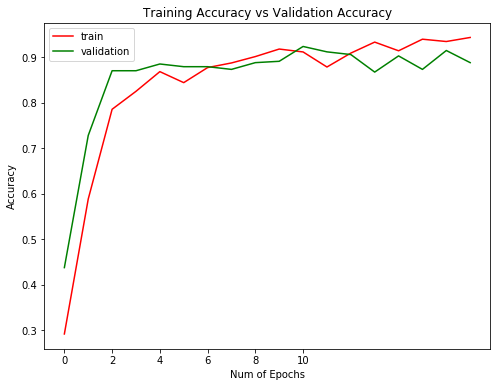

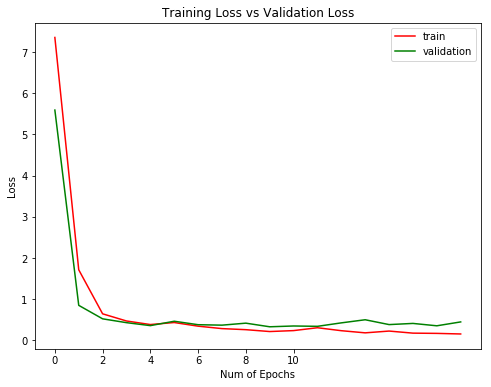

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)  
plt.plot(history_3.history['acc'],'r')  
plt.plot(history_3.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history_3.history['loss'],'r')  
plt.plot(history_3.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

Ahora volvemos a probar el modelo, esta vez aumentamos ligeramente los valores de los parámetros usados en el data_augmentation, y aumentamos el número de epochs del entrenamiento a 50.

No vuelven a apreciarse grandes cambios, aunque ligeramente parece que tarda algo más en aprender al principio, puede ser por el pequeño aumento en los valores de los parámetros comentados.

In [0]:
train_datagen_4 = ImageDataGenerator(rescale=1./255,
        shear_range=0.25,
        zoom_range=0.25,
        rotation_range=25,
        horizontal_flip=True)

test_datagen_4 = ImageDataGenerator(rescale=1./255)

train_generator_4 = train_datagen_4.flow_from_directory(
        datadir_train,
        target_size=(255, 255),
        batch_size=64,
        class_mode='binary')

test_generator_4 = test_datagen_4.flow_from_directory(
        datadir_test,
        target_size=(255, 255),
        batch_size=64,
        class_mode='binary')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


In [0]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

callbacks = myCallback()

model_4.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_4 = model_4.fit_generator(train_generator_4, steps_per_epoch=2000, epochs=50, validation_data=test_generator_4, callbacks=[myCallback()])

Epoch 1/50
13/13 [==============================] - 150s 12s/step - loss: 4.8876 - acc: 0.4765 - val_loss: 1.1708 - val_acc: 0.5976
Epoch 2/50
13/13 [==============================] - 143s 11s/step - loss: 0.9205 - acc: 0.6252 - val_loss: 0.4928 - val_acc: 0.8521
Epoch 3/50
13/13 [==============================] - 150s 12s/step - loss: 0.5585 - acc: 0.7675 - val_loss: 0.3463 - val_acc: 0.8876
Epoch 4/50
13/13 [==============================] - 145s 11s/step - loss: 0.4409 - acc: 0.8221 - val_loss: 0.4400 - val_acc: 0.8402
Epoch 5/50
13/13 [==============================] - 145s 11s/step - loss: 0.4349 - acc: 0.8323 - val_loss: 0.4269 - val_acc: 0.8698
Epoch 6/50
13/13 [==============================] - 145s 11s/step - loss: 0.3499 - acc: 0.8679 - val_loss: 0.4504 - val_acc: 0.8846
Epoch 7/50
13/13 [==============================] - 146s 11s/step - loss: 0.3267 - acc: 0.8767 - val_loss: 0.3525 - val_acc: 0.8817
Epoch 8/50
13/13 [==============================] - 146s 11s/step - loss: 0.

In [0]:
test_loss_4, test_acc_4 = model_4.evaluate(test_generator_4)
print('Test accuracy:', test_acc_4)

6/6 [==============================] - 15s 2s/step - loss: 0.2634 - acc: 0.9053
Test accuracy: 0.9053255


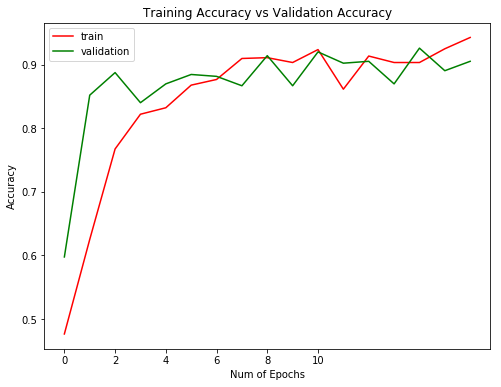

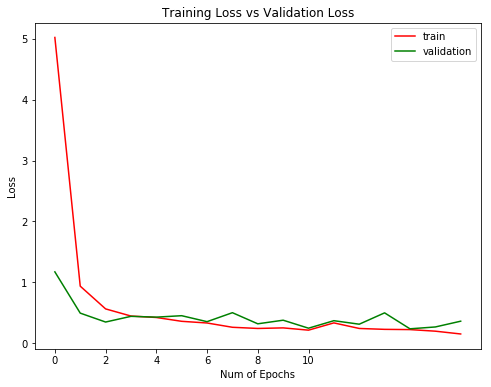

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)  
plt.plot(history_4.history['acc'],'r')  
plt.plot(history_4.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(history_4.history['loss'],'r')  
plt.plot(history_4.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

En general pensamos que los datos son insuficientes en cantidad para poder hacer redes profundas y que entrenen correctamente. Parece que con estos datos la red aprende muy fácil, y puede ser que pueda caer con facilidad en overfitting.

También al ser pocos datos, y tener unos recursos limitados, cuando se ha hecho alguna prueba con un aumento considerable de los parámetros de data augmentation, o metiendo más cantidad de parámetros, no se obtenian resultados nada buenos y a la red le costaba en exceso aprender o no era capaz en 30 epochs de aprender casi nada.